In [60]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option('display.max_columns', 500)


sns.set(style="white")

In [61]:
# reading the merged file. 

df =pd.read_csv("/Users/jj/PycharmProjects/little_ds_problem/src/merged.vcf", sep="\t", index_col=0)

In [62]:
# dropping duplicated rows after merging.
df = df.drop_duplicates()

# Looking at the heat map, T_QQ, ti_NS and ti_HS is None and FILTER is always PASS. 
# tf_GT == 

df = df.drop(["ti_NS", 'ti_HS', 'T_QQ', 'FILTER', 'tf_GT', 'T_GT', 'Q_GT', 'ti_OID', 'T_BD'], axis=1)




# Drop all rows with multiple alternate allele observations.

def get_mult_alt(row):
    if len(row.ALT.split(",")) > 1:
        return 1
    else:
        return 0
    

df["mult_alt_allele"] = df.apply(get_mult_alt, axis=1)


# Q_BD is our Target.  Looking at this, there is only two option.  FP or TP. 
# I will make another column called target FP = 0 or FALSE, TP = 1 or TRUE.

def get_target(row):
    if row.Q_BD == 'FP':
        return 0
    elif row.Q_BD == 'TP':
        return 1 
   

df["target"] = df.apply(get_target, axis=1)

# excluding multiple alt allele
df = df[df.mult_alt_allele != 1]


# pandas somehow defaulted some columns as object type, I am casting them to float. 
obj_df = df.select_dtypes(include=['object']).copy()
fs = ['tf_AO','tf_SAF','tf_SAR','tf_FAO','tf_AF','tf_FSAF','tf_FSAR','ti_AO','ti_SAF','ti_SAR','ti_FAO', 'ti_AF', 'ti_FSAF', 'ti_FSAR', 'ti_RBI', 'ti_LEN', 'ti_HRUN', 'ti_RBI', 'ti_FWDB',
       'ti_REVB', 'ti_REFB', 'ti_VARB', 'ti_SSSB', 'ti_SSEN', 'ti_SSEP',
       'ti_STB', 'ti_STBP', 'ti_PB', 'ti_PBP', 'ti_MLLD', 'ti_OPOS' ]

for f in fs:
    s = obj_df[f]
    df[f] = pd.to_numeric(s, downcast='float')

df = df.drop(['Q_BD', 'ti_FR', 'T_BI', 'T_BK', 'T_BLT', 'T_BVT', 'Q_BI', 'Q_BK', 'Q_BLT', 'Q_BVT', 'REF', 'ALT', 'ti_OREF', 'ti_OALT', 'ti_OMAPALT'], axis=1)

df2 = pd.get_dummies(df["ti_TYPE"])

df = pd.concat([df, df2], axis=1)

df.to_csv("testing.csv", sep='\t')

In [63]:
# Look at the correlation matrix and figure out which fields are not important. 
# keep tf_GQ
# drop 'tf_DP', 'tf_RO', 'tf_SRF', 'tf_SRR'

df = df.drop(['tf_DP', 'ti_DP', 'tf_RO', 'tf_SRF', 'tf_SRR', 'ti_OPOS', 'tf_SAF','tf_SAR', 'ti_SAF', 'ti_SAR','ti_SRF','ti_SRR','ti_FSRR','ti_FSAF','ti_FSAR','ti_FSRF','ti_AF', 'ti_AO', 'tf_AF'], axis=1)




corr_matrix = df.corr()

high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y] 

high_corr_var







# df[["tf_GQ",'tf_FSRF']]

[('QUAL', 'tf_AO'),
 ('QUAL', 'tf_FAO'),
 ('QUAL', 'tf_FSAF'),
 ('QUAL', 'tf_FSAR'),
 ('QUAL', 'ti_FAO'),
 ('QUAL', 'Q_QQ'),
 ('tf_GQ', 'tf_FRO'),
 ('tf_GQ', 'tf_FSRF'),
 ('tf_GQ', 'tf_FSRR'),
 ('tf_GQ', 'ti_FRO'),
 ('tf_AO', 'tf_FDP'),
 ('tf_AO', 'tf_FAO'),
 ('tf_AO', 'tf_FSAF'),
 ('tf_AO', 'tf_FSAR'),
 ('tf_AO', 'ti_FDP'),
 ('tf_AO', 'ti_FAO'),
 ('tf_AO', 'Q_QQ'),
 ('tf_FDP', 'tf_FAO'),
 ('tf_FDP', 'ti_FDP'),
 ('tf_FDP', 'ti_FAO'),
 ('tf_FRO', 'tf_FSRF'),
 ('tf_FRO', 'tf_FSRR'),
 ('tf_FRO', 'ti_RO'),
 ('tf_FRO', 'ti_FRO'),
 ('tf_FAO', 'tf_FSAF'),
 ('tf_FAO', 'tf_FSAR'),
 ('tf_FAO', 'ti_FDP'),
 ('tf_FAO', 'ti_FAO'),
 ('tf_FAO', 'Q_QQ'),
 ('tf_FSRF', 'tf_FSRR'),
 ('tf_FSRF', 'ti_RO'),
 ('tf_FSRF', 'ti_FRO'),
 ('tf_FSRR', 'ti_RO'),
 ('tf_FSRR', 'ti_FRO'),
 ('tf_FSAF', 'ti_FAO'),
 ('tf_FSAF', 'Q_QQ'),
 ('tf_FSAR', 'ti_FAO'),
 ('tf_FSAR', 'Q_QQ'),
 ('ti_RO', 'ti_FRO'),
 ('ti_FDP', 'ti_FAO'),
 ('ti_FAO', 'Q_QQ')]

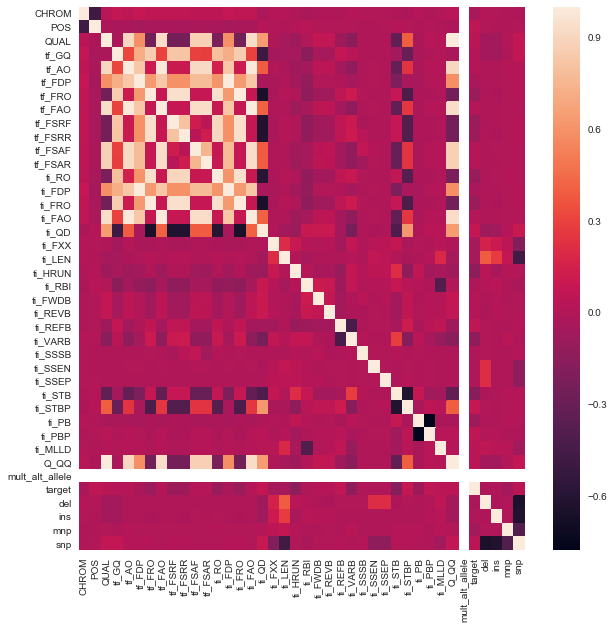

In [64]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))    



sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, ax=ax)



fig = ax.get_figure()
fig.savefig('heatmap.png')

              CHROM           POS          QUAL         tf_GQ         tf_AO  \
count  50695.000000  5.069500e+04  50695.000000  50695.000000  50695.000000   
mean       9.966229  7.380541e+07    544.722543    142.641937     77.842690   
std        6.374044  5.800311e+07    627.913496    145.153130     68.162582   
min        1.000000  6.115000e+03     10.000000      3.000000      2.000000   
25%        4.000000  2.922152e+07    146.052500     38.000000     31.000000   
50%       10.000000  5.715714e+07    308.305000     89.000000     59.000000   
75%       16.000000  1.115425e+08    677.134000    202.000000    103.000000   
max       22.000000  2.491495e+08   3854.940000    842.000000   1101.000000   

             tf_FDP        tf_FRO        tf_FAO       tf_FSRF       tf_FSRR  \
count  50638.000000  50638.000000  50638.000000  50638.000000  50638.000000   
mean     115.836684     37.897034     77.907677     18.927604     18.969430   
std       83.037383     46.279021     65.072060    

In [70]:
t_df = df.select_dtypes(exclude=['object']).copy()
t_df = t_df.dropna(how='any')

In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [75]:
models = []
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier()))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))

In [76]:
from sklearn.model_selection import train_test_split
test_df = t_df 

x = test_df.drop(['target', 'mult_alt_allele'], axis=1)
y = test_df.target

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=22, test_size=0.2)

# X_test and Y_test are the holdout set in this case.  


In [77]:
def binary_classification(models, X_train, Y_train):
    
    results = []
    names = []
    
    for name, model in models:
        kfold = KFold(n_splits=10, random_state=22)
        cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="accuracy")
        names.append(name)
        results.append(cv_result)
        
    for i in range(len(names)):
        print(names[i], results[i].mean())
    
    return results, names

        
results, names = binary_classification(models, X_train, Y_train)
# Commenting this for now. 

LR 0.813947173537
NB 0.813947173537
KNN 0.850876326833
DT 0.823154776598
SVM 0.813947173537


In [ ]:
def visualize_results(results, names):
    ax = sns.boxplot(data=results)
    ax.set_xticklabels(names)

visualize_results(results, names)



0.862954186414


In [101]:
# https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/
# This has lots of information for KNN 
# So far we came to conclusion that KNN worked the best. 


# creating odd list of K for KNN
myList = list(range(1,50))

# subsetting just the odd ones
# neighbors = filter(lambda x: x % 2 != 0, myList)
neighbors = [num for num in myList if num % 2 == 1]
    


cv_scores = []
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)

    kfold = KFold(n_splits=10, random_state=22)
    scores = cross_val_score(knn, X_train, Y_train, cv=kfold, scoring="accuracy")
    cv_scores.append(scores.mean())

[0.85954085411009618, 0.85413478153542344, 0.85087632683288084, 0.84887682053813873, 0.84862996790915823, 0.84576647741298439, 0.84263144902493214, 0.83976795852875841, 0.83757097013083182, 0.83766971118242406, 0.83692915329548256, 0.83618859540854107, 0.83428783016539132, 0.83413971858800307, 0.83465810910886196, 0.83352258701555171, 0.83231300913354733, 0.83135028388052334, 0.83041224389039736, 0.83011602073562085, 0.82979511231794623, 0.82949888916316961, 0.82905455443100473, 0.82853616391014562, 0.828239940755369]
The optimal number of neighbors is: %d 1


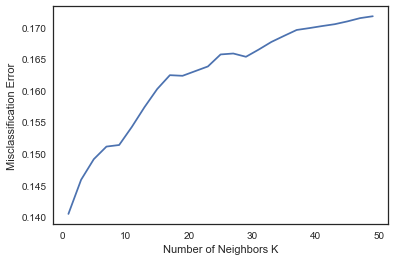

In [103]:
# changing to misclassification error
MSE = [float(1 - x) for x in cv_scores]

# determining best k

optimal_k = neighbors[MSE.index(min(MSE))]

print("The optimal number of neighbors is: %d", optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

# Looks like knn=1 gives the highest accuracy. 


In [107]:
from sklearn.metrics import accuracy_score


knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print(accuracy_score(Y_test, pred))



[1 1 1 ..., 1 1 1]
0.862954186414


In [108]:
from sklearn.metrics import classification_report


print(classification_report(Y_test, pred))

             precision    recall  f1-score   support

          0       0.62      0.65      0.63      1835
          1       0.92      0.91      0.92      8293

avg / total       0.87      0.86      0.86     10128

